### Importing libraries
We are using some libraries in this project including numpy, matplotlib and scikit-learn


In [0]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


### Importing database
We are importing the database from a **Position_Salaries.csv** from this link https://raw.githubusercontent.com/SiddhantAttavar/PolynomialRegression/master/Position_Salaries.csv.                          
Then we create two arrays **X** and **Y** to store the data. **X** stores the level data and **Y** stores the salary data.

In [2]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/SiddhantAttavar/PolynomialRegression/master/Position_Salaries.csv' 
datas = pd.read_csv(url) 
print(datas)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [0]:
X = datas.iloc[:, 1:2].values 
Y = datas.iloc[:, 2].values 

### Plotting the dataset
We are using a scatter plot to visualise the data.

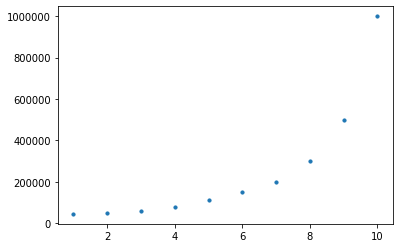

In [4]:
plt.scatter(X, Y, s=10)
plt.show()

### Doing Polynomial Regression
In these cells, we are creating doing Polynomial Regression using **scikit-learn**.


In [5]:
# Fitting Polynomial Regression to the dataset  

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, Y) 
lin_poly = LinearRegression() 
lin_poly.fit(X_poly, Y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculating error
Here we are calculating the mean_square_error and the R2 score.

In [6]:
rmse = np.sqrt(mean_squared_error(Y,lin_poly.predict(poly.fit_transform(X))))
r2 = r2_score(Y,lin_poly.predict(poly.fit_transform(X)))
print(rmse)
print(r2)

82212.12400451247
0.9162082221443942


### Visualising results
First we find the function generated by polynomial regression, and then graph the results

In [7]:
print(lin_poly.coef_)
print(lin_poly.intercept_)

[      0.         -132871.21212121   19431.81818182]
232166.6666666664


In [8]:
res = "f(x) = " + str(lin_poly.intercept_)

for i,r in enumerate(lin_poly.coef_):
    res = res + " + {}*x^{} ".format("%.2f" % r, i)

print (res)

f(x) = 232166.6666666664 + 0.00*x^0  + -132871.21*x^1  + 19431.82*x^2 


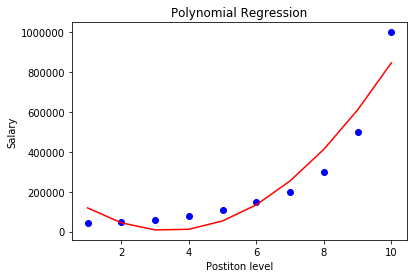

In [9]:
# Visualising the Polynomial Regression results 
plt.scatter(X, Y, color = 'blue') 

plt.plot(X, lin_poly.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Postiton level') 
plt.ylabel('Salary') 

plt.show() 


### Testing the model
We predict the salary for a level 11 using our model.

In [10]:
# Predicting a new result with Polynomial Regression 
lin_poly.predict(poly.fit_transform([[11.0]]))[0] 


1121833.333333334